# Load Dataset

In [39]:
import pandas as pd
import os
import zipfile
import urllib.request

# Unduh dataset MovieLens 1M dari URL resmi
url = 'https://files.grouplens.org/datasets/movielens/ml-1m.zip'
dataset_path = 'ml-1m.zip'

if not os.path.exists('ml-1m'):
    print("Mengunduh dataset MovieLens 1M...")
    urllib.request.urlretrieve(url, dataset_path)

    # Ekstrak file ZIP
    with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
        zip_ref.extractall()

    print("Ekstraksi selesai.")
else:
    print("Dataset sudah ada, tidak perlu diunduh ulang.")

# Load users.dat
users = pd.read_csv('ml-1m/users.dat', sep='::', engine='python',
                    names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])

# Load movies.dat
# Specify encoding as 'latin-1' or 'cp1252' to handle non-UTF-8 characters
movies = pd.read_csv('ml-1m/movies.dat', sep='::', engine='python',
                     names=['MovieID', 'Title', 'Genres'], encoding='latin-1')

# Load ratings.dat
ratings = pd.read_csv('ml-1m/ratings.dat', sep='::', engine='python',
                      names=['UserID', 'MovieID', 'Rating', 'Timestamp'])

# Tampilkan ringkasan
print(f"Jumlah pengguna: {users.shape[0]}")
print(f"Jumlah film: {movies.shape[0]}")
print(f"Jumlah rating: {ratings.shape[0]}")

Dataset sudah ada, tidak perlu diunduh ulang.
Jumlah pengguna: 6040
Jumlah film: 3883
Jumlah rating: 1000209


# Data Understanding

## Informasi Umum Dataset

### Data Users

In [40]:
# Contoh data
print("\nContoh pengguna:")
print(users.head())


Contoh pengguna:
   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455


In [41]:
# Ukuran data
print(f"Jumlah baris: {users.shape[0]}")
print(f"Jumlah kolom: {users.shape[1]}")

# Info data
users.info()

Jumlah baris: 6040
Jumlah kolom: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [42]:
# Cek Data Kosong
print("\nJumlah data kosong:")
print(users.isnull().sum())


Jumlah data kosong:
UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64


In [43]:
# Cek Data Duplikat
print("\nJumlah data duplikat:")
print(users.duplicated().sum())


Jumlah data duplikat:
0


### Data Ratings

In [44]:
print("\nContoh rating:")
print(ratings.head())


Contoh rating:
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291


In [45]:
# Ukuran data
print(f"Jumlah baris: {ratings.shape[0]}")
print(f"Jumlah kolom: {ratings.shape[1]}")

# Info data
ratings.info()

Jumlah baris: 1000209
Jumlah kolom: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [46]:
# Cek Data Kosong
print("\nJumlah data kosong:")
print(ratings.isnull().sum())


Jumlah data kosong:
UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64


In [47]:
# Cek Data Duplikat
print("\nJumlah data duplikat:")
print(ratings.duplicated().sum())


Jumlah data duplikat:
0


### Data Movies

In [48]:
print("\n contoh film:")
print(movies.head())


 contoh film:
   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy


In [49]:
# Ukuran data
print(f"Jumlah baris: {movies.shape[0]}")
print(f"Jumlah kolom: {movies.shape[1]}")

# Info data
movies.info()

Jumlah baris: 3883
Jumlah kolom: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [50]:
# Cek Data Kosong
print("\nJumlah data kosong:")
print(movies.isnull().sum())


Jumlah data kosong:
MovieID    0
Title      0
Genres     0
dtype: int64


In [51]:
# Cek Data Duplikat
print("\nJumlah data duplikat:")
print(movies.duplicated().sum())


Jumlah data duplikat:
0


## Exploratory Data Analysis

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Distribusi Genre Film

<ipython-input-53-2066625840>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_df.sort_values('Jumlah', ascending=False), x='Jumlah', y='Genre', palette='coolwarm')


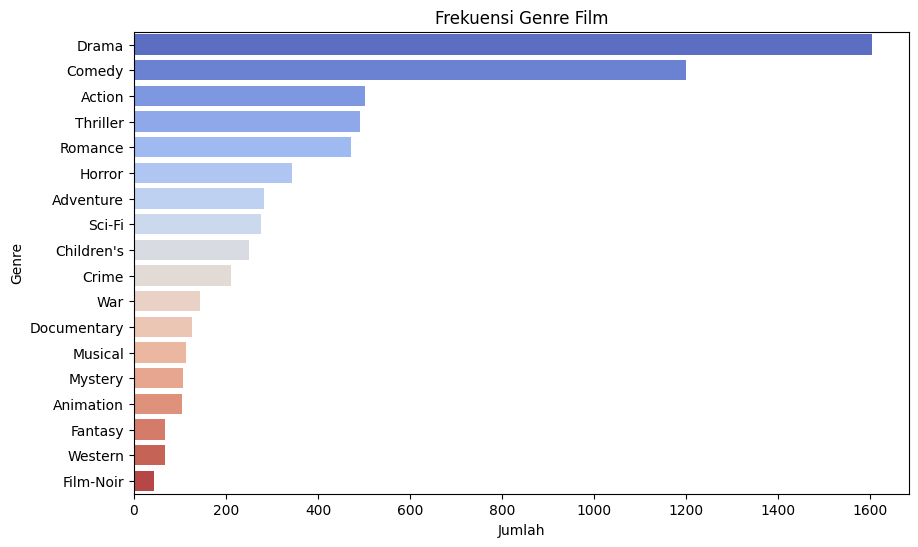

In [53]:
from collections import Counter

# Pisahkan genre karena ada banyak genre dalam satu sel
genre_list = movies['Genres'].str.split('|').sum()
genre_count = Counter(genre_list)

# Konversi ke DataFrame
genre_df = pd.DataFrame(genre_count.items(), columns=['Genre', 'Jumlah'])

# Visualisasikan
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_df.sort_values('Jumlah', ascending=False), x='Jumlah', y='Genre', palette='coolwarm')
plt.title('Frekuensi Genre Film')
plt.xlabel('Jumlah')
plt.ylabel('Genre')
plt.show()

### Distribusi Rating Film

<ipython-input-54-135907497>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=ratings, palette='viridis')


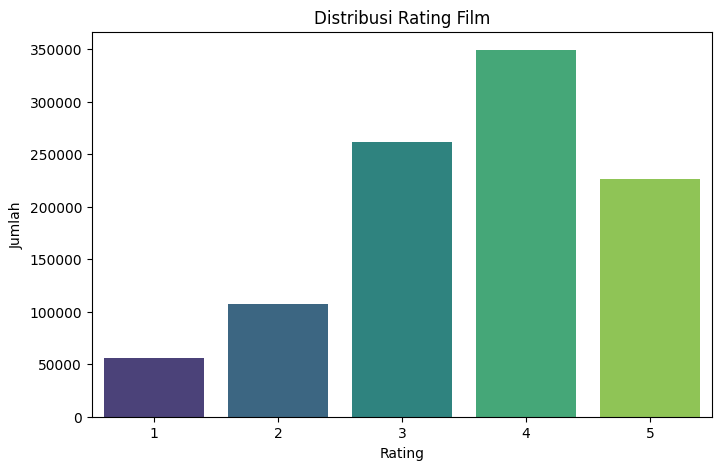

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=ratings, palette='viridis')
plt.title('Distribusi Rating Film')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

### Distribusi Jumlah Rating per Pengguna

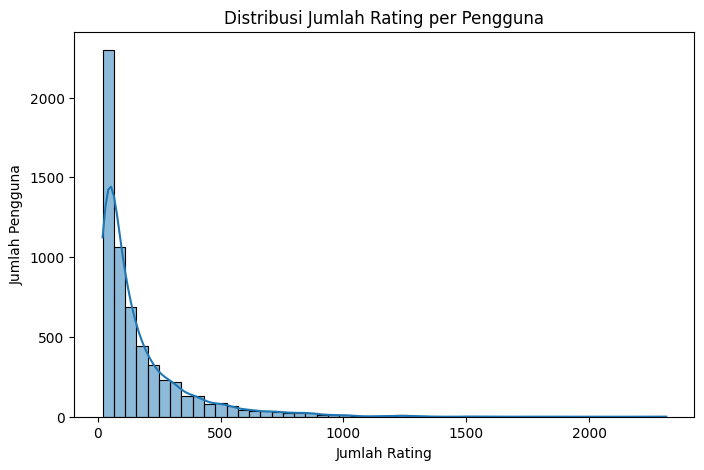

In [55]:
user_rating_count = ratings.groupby('UserID')['Rating'].count()

plt.figure(figsize=(8, 5))
sns.histplot(user_rating_count, bins=50, kde=True)
plt.title('Distribusi Jumlah Rating per Pengguna')
plt.xlabel('Jumlah Rating')
plt.ylabel('Jumlah Pengguna')
plt.show()

## 🔍 Kesimpulan Data Understanding

Berdasarkan proses pemahaman data yang telah dilakukan terhadap MovieLens 1M Dataset, diperoleh beberapa kesimpulan penting sebagai berikut:

- **Dataset yang digunakan sangat lengkap dan bersih**, tanpa nilai kosong maupun duplikat.
- Terdapat **1 juta interaksi (rating)** dari 6.040 pengguna terhadap 3.883 film, dengan informasi pendukung berupa usia, gender, genre film, dan lainnya.
- **Genre film paling umum** adalah *Drama*, *Comedy*, dan *Action*, dengan beberapa film memiliki lebih dari satu genre.
- **Sebagian besar pengguna memberikan rating di angka 3 atau 4**, menunjukkan kecenderungan netral hingga positif dalam penilaian film.
- **Beberapa pengguna sangat aktif**, memberikan ratusan hingga ribuan rating.

Informasi-informasi ini akan sangat membantu dalam menentukan pendekatan terbaik untuk membangun sistem rekomendasi, baik melalui Content-Based Filtering maupun Collaborative Filtering.


# Data Preparation

## Menghapus kolom/fitur yang tidak relevan

In [56]:
# Menghapus kolom/fitur yang tidak relevan pada data users
# Gunakan metode drop() untuk menghapus kolom
users_clean = users.drop(['Gender', 'Age', 'Occupation', 'Zip-code'], axis=1, inplace=True)

# Opsional: Tampilkan info setelah menghapus kolom untuk verifikasi
print("\nInfo data users setelah menghapus kolom Age:")
users.info()


Info data users setelah menghapus kolom Age:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   UserID  6040 non-null   int64
dtypes: int64(1)
memory usage: 47.3 KB


In [57]:
# Menghapus kolom/fitur yang tidak relevan pada data ratings
ratings_clean = ratings.drop(['Timestamp'], axis=1, inplace=True)

# Opsional: Tampilkan info setelah menghapus kolom untuk verifikasi
print("\nInfo data ratings setelah menghapus kolom Timestamp:")
ratings.info()


Info data ratings setelah menghapus kolom Timestamp:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype
---  ------   --------------    -----
 0   UserID   1000209 non-null  int64
 1   MovieID  1000209 non-null  int64
 2   Rating   1000209 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


In [58]:
# Menghapus Kolom Index
movies.reset_index(drop=True, inplace=True)

## Menggabungkan dataset

In [59]:
# Merge ratings dengan movies
ratings_movies = pd.merge(ratings, movies, on='MovieID')

# Merge dengan users
all_data = pd.merge(ratings_movies, users, on='UserID')

# Cek hasil merge
print("Data gabungan:")
print(all_data.head())

Data gabungan:
   UserID  MovieID  Rating                                   Title  \
0       1     1193       5  One Flew Over the Cuckoo's Nest (1975)   
1       1      661       3        James and the Giant Peach (1996)   
2       1      914       3                     My Fair Lady (1964)   
3       1     3408       4                  Erin Brockovich (2000)   
4       1     2355       5                    Bug's Life, A (1998)   

                         Genres  
0                         Drama  
1  Animation|Children's|Musical  
2               Musical|Romance  
3                         Drama  
4   Animation|Children's|Comedy  


## Filtering dengan Rating >+ 3

In [60]:
mov_rate = all_data[all_data['Rating'] >= 3].reset_index(drop=True)
mov_rate

,UserID,MovieID,Rating,Title,Genres
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,My Fair Lady (1964),Musical|Romance
3,1,3408,4,Erin Brockovich (2000),Drama
4,1,2355,5,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...
836473,6040,1090,3,Platoon (1986),Drama|War
836474,6040,1094,5,"Crying Game, The (1992)",Drama|Romance|War
836475,6040,562,5,Welcome to the Dollhouse (1995),Comedy|Drama
836476,6040,1096,4,Sophie's Choice (1982),Drama


## Filter Berdasarkan Pengguna Paling Aktif (Top 500 users)

In [61]:
# Hitung jumlah rating 5 per user
user_rating_5_counts = mov_rate['UserID'].value_counts()

# Ambil 500 UserID dengan jumlah rating 5 terbanyak
# Pastikan jumlah unique UserID dengan rating 5 lebih dari atau sama dengan 500
if len(user_rating_5_counts) >= 500:
    top_500_user_ids_rating_5 = user_rating_5_counts.head(500).index.tolist()
else:
    # Jika unique UserID dengan rating 5 kurang dari 500, gunakan semua unique UserID yang ada
    top_500_user_ids_rating_5 = user_rating_5_counts.index.tolist()
    print(f"Jumlah unique UserID dengan rating 5 kurang dari 500. Menggunakan semua {len(top_500_user_ids_rating_5)} UserID yang tersedia.")

# Filter data gabungan berdasarkan 500 UserID teratas yang dipilih dan rating 5
filtered_data_top_users_rating_5 = mov_rate[mov_rate['UserID'].isin(top_500_user_ids_rating_5)].copy()

print(f"\nUkuran data setelah filtering 500 UserID teratas (berdasarkan rating 5): {filtered_data_top_users_rating_5.shape[0]} baris")
print(f"Jumlah UserID unik setelah filtering: {filtered_data_top_users_rating_5['UserID'].nunique()}")

# Tampilkan contoh data hasil filtering
print("\nContoh data setelah filtering:")
display(filtered_data_top_users_rating_5)


Ukuran data setelah filtering 500 UserID teratas (berdasarkan rating 5): 272811 baris
Jumlah UserID unik setelah filtering: 500

Contoh data setelah filtering:


,UserID,MovieID,Rating,Title,Genres
707,10,2622,5,"Midsummer Night's Dream, A (1999)",Comedy|Fantasy
708,10,648,4,Mission: Impossible (1996),Action|Adventure|Mystery
709,10,2628,3,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Fantasy|Sci-Fi
710,10,3358,5,Defending Your Life (1991),Comedy|Romance
711,10,3359,3,Breaking Away (1979),Drama
...,...,...,...,...,...
835871,6036,562,4,Welcome to the Dollhouse (1995),Comedy|Drama
835872,6036,1096,4,Sophie's Choice (1982),Drama
835873,6036,1097,4,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi
835874,6036,1099,4,"Christmas Carol, A (1938)",Drama


## Label Encoding dan Split Data

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode userId dan movieId
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()

filtered_data_top_users_rating_5['user'] = user_encoder.fit_transform(filtered_data_top_users_rating_5['UserID'])
filtered_data_top_users_rating_5['movie'] = movie_encoder.fit_transform(filtered_data_top_users_rating_5['MovieID'])

num_users = filtered_data_top_users_rating_5['user'].nunique()
num_movies = filtered_data_top_users_rating_5['movie'].nunique()

from sklearn.preprocessing import LabelEncoder

# Label Encoding user dan movie
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()

filtered_data_top_users_rating_5['user'] = user_encoder.fit_transform(filtered_data_top_users_rating_5['UserID'])
filtered_data_top_users_rating_5['movie'] = movie_encoder.fit_transform(filtered_data_top_users_rating_5['MovieID'])

# Simpan mapping movie_index ke MovieID asli
movie_index_to_id = dict(zip(filtered_data_top_users_rating_5['movie'], filtered_data_top_users_rating_5['MovieID']))
movie_id_to_title = dict(zip(filtered_data_top_users_rating_5['MovieID'], filtered_data_top_users_rating_5['Title']))
movie_id_to_genre = dict(zip(filtered_data_top_users_rating_5['MovieID'], filtered_data_top_users_rating_5['Genres']))

# Simpan juga versi kebalikannya jika perlu
movie_id_to_index = dict(zip(ratings['MovieID'], ratings['movie']))

# Bagi data menjadi train dan test
train_data, test_data = train_test_split(filtered_data_top_users_rating_5[['user', 'movie', 'Rating']], test_size=0.2, random_state=42)

## 🔍 Kesimpulan Data Preparation

Berikut adalah tahapan-tahapan data preparation yang dilakukan secara berurutan:

- **Menghapus fitur yang tidak relevan**  
  Kolom seperti `Timestamp`, `Gender`, `Age`, `Occupation`, `Zip-code` dihapus karena tidak memberikan kontribusi terhadap sistem rekomendasi. Penghapusan ini menyederhanakan data dan mempercepat proses analisis.

- **Menggabungkan dataset**  
  Dataset dari film, rating, dan genre digabung menggunakan `MovieID` sebagai kunci utama. Penggabungan ini menghasilkan dataset utuh yang berisi informasi lengkap mengenai pengguna dan film.

- **Filtering dengan Rating ≥ 3**  
   Data difilter untuk hanya menyertakan rating dengan nilai 3 atau lebih. Hal ini dilakukan dengan asumsi bahwa rating di atas atau sama dengan 3 mencerminkan ketertarikan pengguna terhadap film tersebut, sehingga lebih relevan untuk proses rekomendasi.

- **Filter Berdasarkan Top 500 User**  
   Untuk meningkatkan efisiensi dan kualitas rekomendasi, data dibatasi hanya pada 500 pengguna teratas yang paling aktif (memberikan rating terbanyak). Pengguna aktif lebih mungkin memiliki profil preferensi yang lebih representatif.

- **Label Encoding**  
   Kolom `UserID` dan `MovieID` dikonversi menjadi format numerik menggunakan teknik Label Encoding. Ini penting karena model pembelajaran mesin seperti Collaborative Filtering berbasis embedding memerlukan input dalam bentuk indeks numerik.

- **Membagi Data Menjadi Train dan Test**  
   Data kemudian dibagi menjadi data latih dan data uji dengan perbandingan 80:20. Tujuan dari pembagian ini adalah untuk menguji performa model terhadap data yang belum pernah dilihat sebelumnya, sehingga dapat mengevaluasi kemampuan generalisasi model.

Langkah-langkah di atas dilakukan secara berurutan dan saling terkait untuk memastikan bahwa data yang digunakan dalam proses modeling benar-benar siap dan relevan.


Dengan langkah-langkah persiapan data ini, dataset sudah dalam kondisi yang siap untuk digunakan dalam pemodelan sistem rekomendasi berbasis Collaborative Filtering.  Tahapan ini sangat penting untuk memastikan kualitas data, mempercepat proses pelatihan model, serta meningkatkan akurasi rekomendasi yang dihasilkan.



# Modelling

## Collaborative Filtering

In [103]:
# =====================
# COLLABORATIVE FILTERING
# =====================

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

# Parameter embedding
embedding_size = 50

# Input
user_input = Input(shape=(1,), name='user_input')
movie_input = Input(shape=(1,), name='movie_input')

# Embedding layers
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_size)(user_input)
movie_embedding = Embedding(input_dim=num_movies, output_dim=embedding_size)(movie_input)

# Bias opsional
user_bias = Embedding(input_dim=num_users, output_dim=1)(user_input)
movie_bias = Embedding(input_dim=num_movies, output_dim=1)(movie_input)

# Dot product dan penjumlahan bias
dot_product = Dot(axes=2)([user_embedding, movie_embedding])
dot_product = Add()([dot_product, user_bias, movie_bias])
output = Flatten()(dot_product)  # <== TANPA sigmoid

# Bangun model
model = Model(inputs=[user_input, movie_input], outputs=output)

# Compile model
model.compile(
    loss='mae',
    optimizer=Adam(learning_rate=0.001),
    metrics=[RootMeanSquaredError()]
)

# Ringkasan model
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ movie_input         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_12        │ (None, 1, 50)     │     25,000 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_13        │ (None, 1, 50)     │    175,850 │ movie_input[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot_3 (Dot)         │ (None, 1, 1)      │          0 │ embedding_12[0][… │
│                     │                   │            │ embedding_13[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_14        │ (None, 1, 1)      │        500 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_15        │ (None, 1, 1)      │      3,517 │ movie_input[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 1, 1)      │          0 │ dot_3[0][0],      │
│                     │                   │            │ embedding_14[0][… │
│                     │                   │            │ embedding_15[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 1)         │          0 │ add_3[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 204,867 (800.26 KB)

 Trainable params: 204,867 (800.26 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
# Training model
history = model.fit(
    x=[train_data['user'], train_data['movie']],
    y=train_data['Rating'],
    batch_size=64,
    epochs=20,
    validation_data=([test_data['user'], test_data['movie']], test_data['Rating']),
    verbose=1
)

Epoch 1/20
3411/3411 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 2.5055 - root_mean_squared_error: 2.8680 - val_loss: 0.5719 - val_root_mean_squared_error: 0.7206
Epoch 2/20
3411/3411 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.5605 - root_mean_squared_error: 0.7022 - val_loss: 0.5581 - val_root_mean_squared_error: 0.6967
Epoch 3/20
3411/3411 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.5447 - root_mean_squared_error: 0.6789 - val_loss: 0.5527 - val_root_mean_squared_error: 0.6895
Epoch 4/20
3411/3411 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.5317 - root_mean_squared_error: 0.6645 - val_loss: 0.5444 - val_root_mean_squared_error: 0.6793
Epoch 5/20
3411/3411 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.5166 - root_mean_squared_error: 0.6476 - val_loss: 0.5409 - val_root_mean_squared_error: 0.6762
Epoch 6/20
3411/3411 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.4978 - root_mean_squared_error: 0.6282 - val_loss: 0.5377 - val_root_mean_squared_error: 0.6733
Epoch 7/20
3411/3411 ━━━━━━━━━━━━━

In [106]:
import numpy as np

# Pilih satu user untuk diberikan rekomendasi
target_user_id = 10  # ganti dengan ID user yang ingin diuji (dalam bentuk UserID asli) - Menggunakan user yang ada di filtered_data_top_users_rating_5

# Encode user ID (harus disesuaikan dengan LabelEncoder yang digunakan)
# Tambahkan pengecekan apakah user_id ada dalam encoder classes
if target_user_id not in user_encoder.classes_:
    print(f"User {target_user_id} tidak ditemukan dalam data yang digunakan untuk encoding.")
else:
    encoded_user_id = user_encoder.transform([target_user_id])[0]

    # Ambil daftar semua movieID (yang sudah melalui encoding) dari filtered_data_top_users_rating_5
    all_movie_ids = filtered_data_top_users_rating_5['movie'].unique()

    # Ambil daftar movie yang sudah ditonton user
    # Pastikan menggunakan dataframe yang sesuai dengan encoding, yaitu filtered_data_top_users_rating_5
    watched_movie_ids = filtered_data_top_users_rating_5[filtered_data_top_users_rating_5['user'] == encoded_user_id]['movie'].tolist()


    # Ambil daftar movie yang belum ditonton
    unwatched_movie_ids = [movie_id for movie_id in all_movie_ids if movie_id not in watched_movie_ids]

    # Buat DataFrame untuk prediksi
    user_array = np.array([encoded_user_id] * len(unwatched_movie_ids))
    movie_array = np.array(unwatched_movie_ids)

    # Prediksi rating untuk semua film yang belum ditonton user tersebut
    predicted_ratings = model.predict([user_array, movie_array], verbose=0)

    # Buat DataFrame hasil prediksi
    recommendations = pd.DataFrame({
        'movie': movie_array,
        'predicted_rating': predicted_ratings.flatten()
    })

    # Urutkan berdasarkan skor prediksi tertinggi
    recommendations = recommendations.sort_values(by='predicted_rating', ascending=False).head()

    # Decode movie ID asli
    recommendations['MovieID'] = movie_encoder.inverse_transform(recommendations['movie'])

    # Gabungkan dengan metadata film
    # Pastikan menggunakan dataframe movies yang belum di-index ulang jika ada
    top_movies = recommendations.merge(movies[['MovieID', 'Title', 'Genres']], on='MovieID', how='left')

    # Tampilkan hasil
    print(top_movies[['MovieID', 'Title', 'Genres', 'predicted_rating']])

   MovieID                                       Title            Genres  \
0     3028             Taming of the Shrew, The (1967)            Comedy   
1       29           City of Lost Children, The (1995)  Adventure|Sci-Fi   
2     2357  Central Station (Central do Brasil) (1998)             Drama   
3     3111                  Places in the Heart (1984)             Drama   
4      290                   Once Were Warriors (1994)       Crime|Drama   

   predicted_rating  
0          6.128677  
1          6.019066  
2          5.991943  
3          5.856194  
4          5.843888  


## 🤖 Modeling and Result

Pada tahap ini, dilakukan pembangunan sistem rekomendasi dengan pendekatan **Collaborative Filtering** menggunakan model Neural Network berbasis **embedding**.

Langkah-langkah utama dalam proses modeling adalah sebagai berikut:

- Melakukan **encoding** terhadap `UserID` dan `MovieID` menjadi integer menggunakan `LabelEncoder`.
- Membagi dataset menjadi data latih dan data uji dengan perbandingan 80:20.
- Membuat arsitektur model:
  - Dua layer **embedding** untuk merepresentasikan pengguna dan item dalam ruang vektor berdimensi rendah.
  - Operasi **dot product** untuk mengukur kesamaan antara pengguna dan item.
  - Penambahan **user bias** dan **movie bias** untuk memperbaiki representasi skor.
  - Fungsi aktivasi menggunakan **linear** karena target rating bersifat kontinu.
- Menggunakan fungsi loss **Mean Absolute Error (MAE)** dan **Root Mean Squared Error (RMSE)** sebagai metrik evaluasi.
- Melatih model selama beberapa epoch hingga didapatkan performa optimal.

Model ini bertujuan untuk mempelajari representasi laten dari pengguna dan film agar dapat memprediksi rating yang mungkin diberikan pengguna terhadap film yang belum ditonton.

Setelah model dilatih, dilakukan proses **Top-N Recommendation** untuk memberikan rekomendasi film terbaik bagi pengguna berdasarkan prediksi skor tertinggi dari model. Hasil rekomendasi mencakup informasi judul film, genre, dan MovieID-nya.


# Evaluation

In [109]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Prediksi rating pada data uji
# Try passing the dataframe columns directly, similar to model.evaluate
y_pred = model.predict([test_data['user'].values, test_data['movie'].values])
y_true = test_data['Rating'].values

# Hitung metrik evaluasi
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print(f"RMSE on test set: {rmse:.4f}")
print(f"MAE on test set: {mae:.4f}")

1706/1706 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
RMSE on test set: 0.7582
MAE on test set: 0.6014


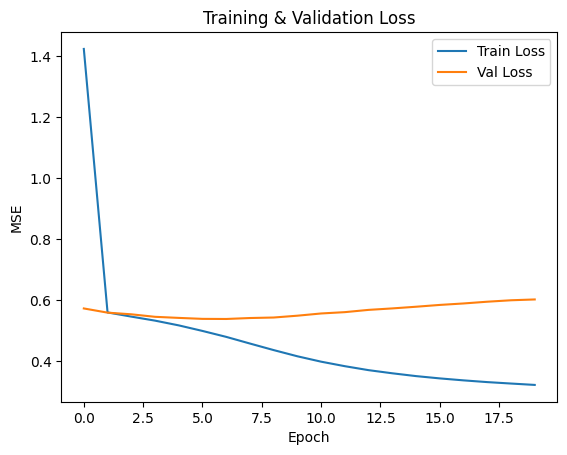

In [112]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()